In [604]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import datetime as dt
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [605]:
df = pd.read_csv("D:\\Lambton Sem 1\\Big data (CBD 2214)\Assignement 1\\dataset.csv")

In [606]:
df.head(20)

,Date,Price,Open,High,Low,Vol.,Change %
0,16-Feb-22,"3,069.74","3,182.32","3,184.15","3,045.92",401.88K,-3.54%
1,15-Feb-22,"3,182.27","2,929.29","3,193.18","2,912.61",540.04K,8.64%
2,14-Feb-22,"2,929.31","2,871.06",NaN,"2,834.13",477.24K,2.06%
3,13-Feb-22,"2,870.25","2,917.16","2,952.94","2,838.29",303.12K,-1.61%
4,12-Feb-22,NaN,"2,927.64","2,984.72","2,858.85",433.29K,-0.36%
5,11-Feb-22,"2,927.63","3,071.80","3,136.33","2,880.60",607.93K,-4.69%
6,10-Feb-22,"3,071.83","3,243.73","3,277.36","3,058.59",742.54K,-5.30%
7,09-Feb-22,"3,243.62","3,115.91","3,266.41","3,055.95",477.82K,4.10%
8,08-Feb-22,"3,115.88","3,139.65","3,228.86","3,029.70",NaN,-0.77%
9,07-Feb-22,"3,140.18","3,056.29","3,185.77","2,995.59",568.42K,2.75%


In [607]:
df.shape

(1128, 7)

In [608]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1115 non-null   object
 1   Price     1112 non-null   object
 2   Open      1114 non-null   object
 3   High      1119 non-null   object
 4   Low       1124 non-null   object
 5   Vol.      1121 non-null   object
 6   Change %  1120 non-null   object
dtypes: object(7)
memory usage: 61.8+ KB


## Data Preparation


In [610]:
# Find out how many percetange of values are NULL or NAN.
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Date        1.15
Price       1.42
Open        1.24
High        0.80
Low         0.35
Vol.        0.62
Change %    0.71
dtype: float64

### * Fill-Out Missing Data

#### 1) Date

In [611]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [612]:
print(f'''Total number of null valus in Date column is:- {df["Date"].isnull().sum()}''')

Total number of null valus in Date column is:- 13


In [613]:
# Function to print all rows which have null values column wise.
def missing_rows(dataframe_name,column_name):
    return dataframe_name[dataframe_name[column_name].isnull()]
missing_rows(dataframe_name=df,column_name="Date")

,Date,Price,Open,High,Low,Vol.,Change %
12,NaN,"2,994.99","2,692.80","2,994.99","2,671.72",908.75K,11.22%
42,NaN,"3,535.86","3,784.47","3,846.44","3,418.46",582.71K,-6.69%
88,NaN,"4,408.85","4,295.27","4,434.27","4,206.75",462.99K,2.64%
139,NaN,"3,000.59","2,851.06","3,047.08","2,837.68",968.23K,5.23%
201,NaN,"2,460.95","2,380.59","2,467.40","2,320.80",1.03M,3.36%
280,NaN,"3,811.77","4,173.61","4,366.10","3,794.15",2.78M,-8.54%
391,NaN,"1,117.33","1,377.63","1,387.39","1,095.26",NaN,-18.89%
494,NaN,370.16,365.25,377.97,364.57,7.17M,1.34%
619,NaN,244.56,242,244.94,235.44,8.10M,1.06%
722,NaN,246.96,265.63,266.17,245.75,NaN,-7.04%


In [614]:
df["Date"] = pd.to_datetime(df.Date)

In [615]:
df["Date"].dtype

dtype('<M8[ns]')

In [616]:
df["Date"].head(14)

0    2022-02-16
1    2022-02-15
2    2022-02-14
3    2022-02-13
4    2022-02-12
5    2022-02-11
6    2022-02-10
7    2022-02-09
8    2022-02-08
9    2022-02-07
10   2022-02-06
11   2022-02-05
12          NaT
13   2022-02-03
Name: Date, dtype: datetime64[ns]

Lets just deconstruct date and make new columns in order to 
store day, month and year.

In [617]:
def make_new_columns_day_month_year(dataframe_name,date_column_name):
    dataframe_name["Day"] = dataframe_name[date_column_name].dt.day
    dataframe_name["Month"] = dataframe_name[date_column_name].dt.month
    dataframe_name["Year"] = dataframe_name[date_column_name].dt.year

In [618]:
make_new_columns_day_month_year(df,"Date")

In [619]:
# we have made new columns day, month and year and its in float format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1115 non-null   datetime64[ns]
 1   Price     1112 non-null   object        
 2   Open      1114 non-null   object        
 3   High      1119 non-null   object        
 4   Low       1124 non-null   object        
 5   Vol.      1121 non-null   object        
 6   Change %  1120 non-null   object        
 7   Day       1115 non-null   float64       
 8   Month     1115 non-null   float64       
 9   Year      1115 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 88.2+ KB


In [620]:
# Let's drop Date column now, we don't need anymore.

def drop_columns_from_dataframe(dataframe_name,list_of_columns_name):
    dataframe_name.drop(list_of_columns_name,axis=1,inplace=True)

In [621]:
drop_columns_from_dataframe(df,["Date"])

In [622]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
0,"3,069.74","3,182.32","3,184.15","3,045.92",401.88K,-3.54%,16.0,2.0,2022.0
1,"3,182.27","2,929.29","3,193.18","2,912.61",540.04K,8.64%,15.0,2.0,2022.0
2,"2,929.31","2,871.06",NaN,"2,834.13",477.24K,2.06%,14.0,2.0,2022.0
3,"2,870.25","2,917.16","2,952.94","2,838.29",303.12K,-1.61%,13.0,2.0,2022.0
4,NaN,"2,927.64","2,984.72","2,858.85",433.29K,-0.36%,12.0,2.0,2022.0


In [623]:
df_day_month_year = df[["Day","Month","Year"]].copy()
df.drop(["Day","Month","Year"],axis=1,inplace=True)

In [624]:
df_day_month_year.head()

,Day,Month,Year
0,16.0,2.0,2022.0
1,15.0,2.0,2022.0
2,14.0,2.0,2022.0
3,13.0,2.0,2022.0
4,12.0,2.0,2022.0


##### Fill missing values in Day column

In [625]:
# First of all we are going to fill missing values in Day column.
def fill_Day_column_missing_values(dataframe_name,row):
    if(np.isnan(row["Month"])):
        dataframe_name.drop(row.name)
    else:
        if((dataframe_name.loc[row.name-1,"Day"] -1) != 0):
            calculated_day = (dataframe_name.loc[row.name-1,"Day"] -1)
        else:
            if(row["Month"] == 4 or row["Month"] == 6 or row["Month"] == 0 or row["Month"] == 11):
                calculated_day = (dataframe_name.loc[row.name-1,"Day"] -1) + 30
            elif(row["Month"] == 2):
                calculated_day = (dataframe_name.loc[row.name-1,"Day"] -1) + 28
            else:
                calculated_day = (dataframe_name.loc[row.name-1,"Day"] -1) + 31
    
        row["Day"] = calculated_day
            


def fill_missing_values_for_day(dataframe_name):
    dataframe_name = dataframe_name.apply(
        lambda row: fill_Day_column_missing_values(dataframe_name,row) if np.isnan(row["Day"]) else row,
        axis=1
    )


In [626]:
fill_missing_values_for_day(df_day_month_year)

##### Fill missing values in Month column

In [627]:

# Now, we are going to fill missing values in Month column.
def fill_Month_column_missing_values(dataframe_name, row):
    if((row["Day"] != 30 or row["Day"] != 31)):
        calculated_month = dataframe_name.loc[row.name-1, "Month"]
    elif(row["Day"] == 28 and dataframe_name.loc[row.name-1, "Month"] == 3):
        calculated_month = 2
    else:
        calculated_month = dataframe_name.loc[row.name-1, "Month"]-1
    row["Month"] = calculated_month


def fill_missing_values_for_month(dataframe_name):
    dataframe_name = dataframe_name.apply(
        lambda row: fill_Month_column_missing_values(
            dataframe_name, row) if np.isnan(row["Month"]) else row,
        axis=1
    )


In [628]:
fill_missing_values_for_month(df_day_month_year)

##### Fill missing values in Year column

In [629]:
# Now, we are going to fill missing values in Month column.
def fill_Year_column_missing_values(dataframe_name, row):
    if(row["Day"] == 31 and row["Month"] == 12):
        calculated_Year = dataframe_name.loc[row.name-1, "Year"] -1
    else:
        calculated_Year = dataframe_name.loc[row.name-1, "Year"]
    row["Year"] = calculated_Year


def fill_missing_values_for_year(dataframe_name):
    dataframe_name = dataframe_name.apply(
        lambda row: fill_Year_column_missing_values(
            dataframe_name, row) if np.isnan(row["Year"]) else row,
        axis=1
    )


In [630]:
fill_missing_values_for_year(df_day_month_year)


In [631]:
# As we can clearly see all null values are being filled with new values.
df_day_month_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1115 non-null   float64
 1   Month   1128 non-null   float64
 2   Year    1128 non-null   float64
dtypes: float64(3)
memory usage: 26.6 KB


In [632]:
# Let's merge our new dataframe with older one.
df = pd.concat([df,df_day_month_year],axis = 1)

In [633]:
df_day_month_year.head()

,Day,Month,Year
0,16.0,2.0,2022.0
1,15.0,2.0,2022.0
2,14.0,2.0,2022.0
3,13.0,2.0,2022.0
4,12.0,2.0,2022.0


In [634]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
0,"3,069.74","3,182.32","3,184.15","3,045.92",401.88K,-3.54%,16.0,2.0,2022.0
1,"3,182.27","2,929.29","3,193.18","2,912.61",540.04K,8.64%,15.0,2.0,2022.0
2,"2,929.31","2,871.06",NaN,"2,834.13",477.24K,2.06%,14.0,2.0,2022.0
3,"2,870.25","2,917.16","2,952.94","2,838.29",303.12K,-1.61%,13.0,2.0,2022.0
4,NaN,"2,927.64","2,984.72","2,858.85",433.29K,-0.36%,12.0,2.0,2022.0


<AxesSubplot:xlabel='Day', ylabel='Count'>

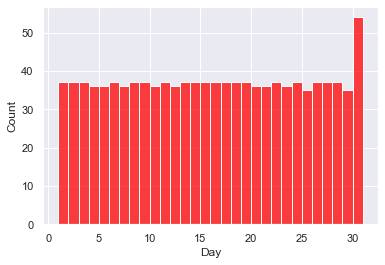

In [635]:
# Let's Analyze how far the data is spread.
list_of_days = []
for i in range(0, 31):
    list_of_days.append(i+1)
sns.histplot(df['Day'], color ='red',bins=list_of_days)

In [636]:
# filter on rows with specific values for day column.
def day_filter_with_specific_value(dataframe_name,column_name,value):
    return dataframe_name[dataframe_name[column_name] == value]

temp_df = day_filter_with_specific_value(
    dataframe_name=df,
    column_name="Day",
    value=31
)
len(temp_df)

22

<AxesSubplot:xlabel='Month', ylabel='Count'>

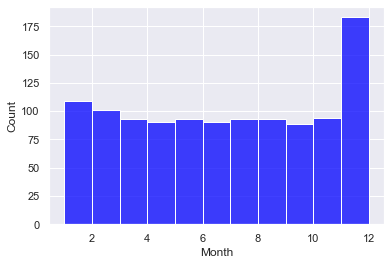

In [637]:
# Let's Analyze how far the data is spread.
list_of_months = []
for i in range(0, 12):
    list_of_months.append(i+1)
sns.histplot(df['Month'], color ='blue',bins=list_of_months)

In [638]:
# filter on rows with specific values for month column.
def month_filter_with_specific_value(dataframe_name,column_name,value):
    return dataframe_name[dataframe_name[column_name] == value]

temp_df = month_filter_with_specific_value(
    dataframe_name=df,
    column_name="Month",
    value=12
)
len(temp_df)

93

In [639]:
# Function to print all rows which have null values column wise.
len(missing_rows(dataframe_name=df,column_name="Month"))

0

<AxesSubplot:xlabel='Year', ylabel='Count'>

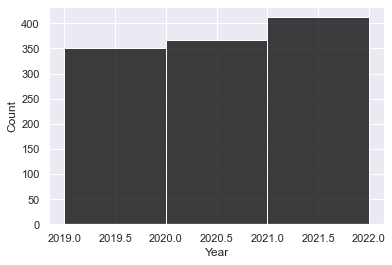

In [640]:
# Let's Analyze how far the data is spread.
list_of_years = [2019,2020,2021,2022]
sns.histplot(df['Year'], color ='black',bins=list_of_years)

In [641]:
# filter on rows with specific values for year column.
def year_filter_with_specific_value(dataframe_name,column_name,value):
    return dataframe_name[dataframe_name[column_name] == value]

temp_df = year_filter_with_specific_value(
    dataframe_name=df,
    column_name="Year",
    value=2022
)
len(temp_df)

47

#### 2) Price

In [642]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month',
       'Year'],
      dtype='object')

In [643]:
missing_rows(dataframe_name=df,column_name="Price")

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
4,NaN,"2,927.64","2,984.72","2,858.85",433.29K,-0.36%,12.0,2.0,2022.0
32,NaN,"3,307.84","3,369.95","3,265.41",292.10K,0.60%,15.0,1.0,2022.0
271,NaN,"2,766.88","2,931.66",NaN,4.23M,-12.40%,21.0,5.0,2021.0
350,NaN,"1,488.80","1,653.04","1,477.72",1.17M,5.54%,3.0,3.0,2021.0
402,NaN,"1,275.87","1,347.98","1,180.45",2.65M,-1.53%,10.0,1.0,2021.0
536,NaN,395.32,405.53,391.97,5.23M,0.93%,29.0,8.0,2020.0
607,NaN,231.34,231.94,226.97,5.56M,-0.97%,19.0,6.0,2020.0
710,NaN,237.3,237.3,196.71,24.76M,-16.08%,8.0,3.0,2020.0
778,NaN,131.87,133.53,128.27,12.89M,-1.99%,31.0,12.0,2019.0
816,NaN,149.79,154.25,146.6,11.84M,1.77%,23.0,11.0,2019.0


In [644]:
df = df.replace(',','', regex=True)

In [645]:
df["Price"] = df["Price"].astype(float).fillna(0.0)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution before filling missing values')

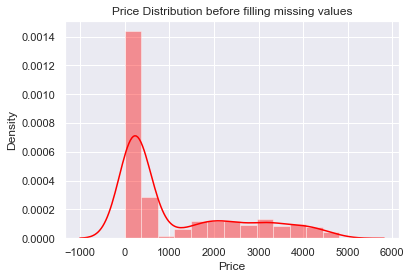

In [646]:
sns.distplot(df['Price'], color ='red').set_title("Price Distribution before filling missing values")

In [647]:
df_price = df[["Price"]].copy()

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution after filling missing values with mean')

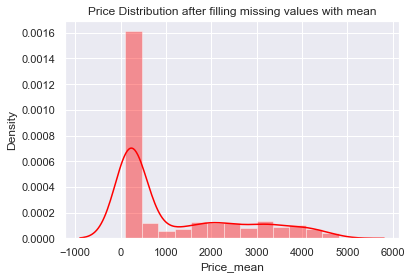

In [648]:
# Let's apply various methods for filling missing values.
# Mean
df_price["Price_mean"] = df_price["Price"].replace(0,df_price["Price"].mean())
sns.distplot(df_price['Price_mean'], color ='red').set_title("Price Distribution after filling missing values with mean")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution after filling missing values with median')

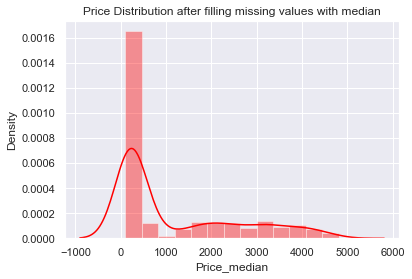

In [649]:
# Median
df_price["Price_median"] = df_price["Price"].replace(0,df_price["Price"].median())
sns.distplot(df_price['Price_median'], color ='red').set_title("Price Distribution after filling missing values with median")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution after filling missing values with mode')

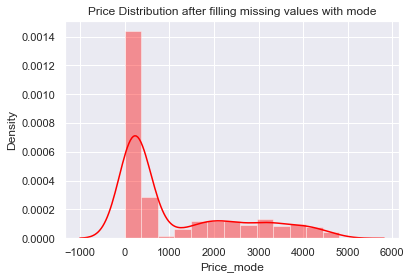

In [650]:
# Mode
df_price["Price_mode"] = df_price["Price"].replace(0,df_price["Price"].mode()[0])
sns.distplot(df_price['Price_mode'], color ='red').set_title("Price Distribution after filling missing values with mode")

As we can clearly see from above graphs that,
Graph with missing values and after applying mode method in order to fill missing values seems to
be same.

In [651]:
df["Price"] = df_price["Price_mode"]

#### 2) Open

In [652]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month',
       'Year'],
      dtype='object')

In [653]:
missing_rows(
    column_name="Open",
    dataframe_name=df
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
23,2441.01,NaN,2540.81,2161.55,1.56M,-3.93%,24.0,1.0,2022.0
73,4194.80,NaN,4247.38,4036.00,707.69K,1.73%,5.0,12.0,2021.0
129,3415.03,NaN,3599.18,3409.22,767.49K,-4.45%,10.0,10.0,2021.0
214,1897.98,NaN,1917.80,1851.97,623.52K,1.05%,17.0,7.0,2021.0
331,1682.37,NaN,1806.62,1659.28,1.58M,-5.68%,22.0,3.0,2021.0
380,1373.40,NaN,1376.44,1272.09,1.65M,4.62%,1.0,2.0,2021.0
460,476.29,NaN,477.78,457.65,9.85M,2.97%,13.0,11.0,2020.0
540,383.20,NaN,409.02,370.4,8.28M,-6.01%,25.0,8.0,2020.0
610,235.36,NaN,235.95,228.99,7.03M,1.92%,16.0,6.0,2020.0
673,158.45,NaN,161.57,155.52,21.20M,1.33%,14.0,4.0,2020.0


In [654]:
df["Open"] = df["Open"].astype(float).fillna(0.0)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Open Distribution before filling missing values')

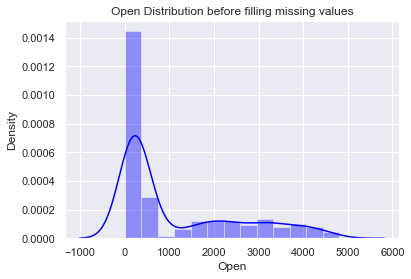

In [655]:
sns.distplot(df['Open'], color ='blue').set_title("Open Distribution before filling missing values")

In [656]:
df_open = df[["Open"]].copy()

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Open Distribution after filling missing values with mean')

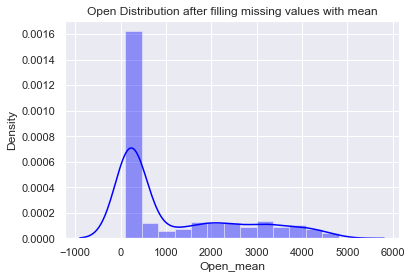

In [657]:
# Let's apply various methods for filling missing values.
# Mean
df_open["Open_mean"] = df_open["Open"].replace(0,df_open["Open"].mean())
sns.distplot(df_open['Open_mean'], color ='blue').set_title("Open Distribution after filling missing values with mean")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Open Distribution after filling missing values with median')

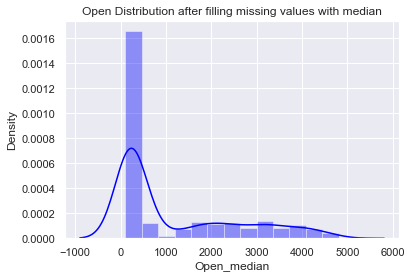

In [658]:
# Median
df_open["Open_median"] = df_open["Open"].replace(0,df_open["Open"].median())
sns.distplot(df_open['Open_median'], color ='blue').set_title("Open Distribution after filling missing values with median")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Open Distribution after filling missing values with mode')

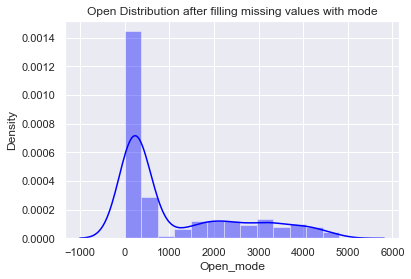

In [659]:
# Mode
df_open["Open_mode"] = df_open["Open"].replace(0,df_open["Open"].mode()[0])
sns.distplot(df_open['Open_mode'], color ='blue').set_title("Open Distribution after filling missing values with mode")

As we can clearly see from above graphs that,
Graph with missing values and after applying mode method in order to fill missing values seems to
be same.

In [660]:
df["Open"] = df_open["Open_mode"]

#### 4) High, Low

In [661]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month',
       'Year'],
      dtype='object')

In [662]:
# All rows of dataset having missing values in High column.
missing_rows(
    column_name="High",
    dataframe_name=df
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
2,2929.31,2871.06,NaN,2834.13,477.24K,2.06%,14.0,2.0,2022.0
83,4520.30,4270.73,NaN,4248.90,578.65K,5.77%,25.0,11.0,2021.0
204,2300.22,2230.24,NaN,2152.92,1.25M,3.17%,27.0,7.0,2021.0
260,2633.67,2707.94,NaN,2529.73,2.45M,-2.76%,1.0,6.0,2021.0
680,164.71,171.07,NaN,162.75,35.79M,-3.71%,7.0,4.0,2020.0
762,164.36,166.44,NaN,159.08,16.24M,-1.26%,16.0,1.0,2020.0
923,220.16,224.68,NaN,215.57,7.54M,-2.00%,8.0,8.0,2019.0
1056,138.15,139.63,NaN,137.68,9.52M,-1.08%,28.0,3.0,2019.0
1126,122.03,121.71,NaN,117.51,3.61M,0.25%,17.0,1.0,2019.0


In [663]:
# All rows of dataset having missing values in Low column.
missing_rows(
    column_name="Low",
    dataframe_name=df
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
194,2889.43,2827.23,2946.62,NaN,1.06M,2.20%,6.0,8.0,2021.0
271,0.00,2766.88,2931.66,NaN,4.23M,-12.40%,21.0,5.0,2021.0
499,353.28,352.69,354.86,NaN,4.96M,NaN,5.0,10.0,2020.0
690,131.03,131.74,132.68,NaN,21.03M,-0.54%,28.0,3.0,2020.0


In [664]:
df["High"] = df["High"].astype(float).fillna(0.0)
df["Low"] = df["Low"].astype(float).fillna(0.0)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'High, Low Distribution before filling missing values')

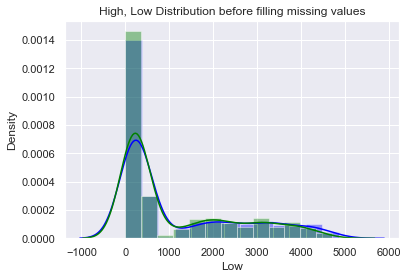

In [665]:
sns.distplot(df['High'], color ='blue')
sns.distplot(df['Low'], color ='green').set_title("High, Low Distribution before filling missing values")

Let's apply mean method here

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'High, Low Distribution after filling missing values with mean')

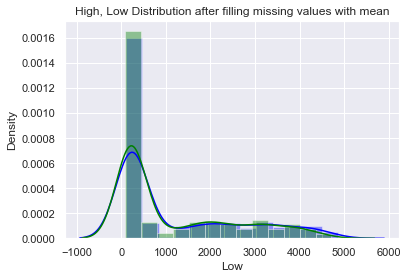

In [666]:
# Mean
df["High"] = df["High"].replace(0,df["High"].mean())
sns.distplot(df['High'], color ='blue')

# Mean
df["Low"] = df["Low"].replace(0,df["Low"].mean())
sns.distplot(df['Low'], color ='green').set_title("High, Low Distribution after filling missing values with mean")

#### 4) Vol

In [667]:
# df.rename(
#     columns={"Vol.": "Volume(In Million)"},
#     inplace=True,
# )


In [668]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month',
       'Year'],
      dtype='object')

In [669]:
missing_rows(
    column_name="Vol.",
    dataframe_name=df,
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
8,3115.88,3139.65,3228.86,3029.70,NaN,-0.77%,8.0,2.0,2022.0
124,3866.90,3790.34,3904.91,3735.21,NaN,2.02%,15.0,10.0,2021.0
309,2299.93,2137.55,2315.47,2136.49,NaN,7.58%,13.0,4.0,2021.0
391,1117.33,1377.63,1387.39,1095.26,NaN,-18.89%,NaN,1.0,2021.0
512,344.03,341.32,346.19,336.15,NaN,0.80%,22.0,9.0,2020.0
677,157.86,169.67,170.10,152.52,NaN,-6.97%,10.0,4.0,2020.0
722,246.96,265.63,266.17,245.75,NaN,-7.04%,NaN,2.0,2020.0


In [682]:
def calculate_volume(value):
    value = str(value)
    if('K' in value):
        value = value.replace('K','')
        return float(value)/1000
    else:
        value = value.replace('M','')
        return float(value)

In [683]:
df['Volume(In Million)'] = df['Vol.'].apply(lambda value : calculate_volume(value))

In [686]:
# Let drop Vol. column as we have created new one.
drop_columns_from_dataframe(
    dataframe_name=df,
    list_of_columns_name=['Vol.']
)